# Mangroves in Pulau Ubin

In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

from mangroves.embeddings import Embeddings
from mangroves.collection import Collection

REGION_DIAMETER_P = 244
SPATIAL_RESOLUTION_M = 10

In [3]:
with open('/Users/galex/Desktop/gee_project_key.txt', "r") as f:
    project = f.readline().strip()

collection = Collection(project=project)

2025-12-02 16:15:04,624 - INFO - Google Earth Engine initialized successfully with service account


In [4]:
# Coords of a mangrove
latitude_deg = 1.41150
longitude_deg = 103.9569
year = 2018

In [5]:
embeddings = Embeddings()
embeddings.from_collection(
    latitude_deg, 
    longitude_deg, 
    year, 
    REGION_DIAMETER_P, 
    SPATIAL_RESOLUTION_M, 
    collection
)

2025-12-02 16:15:04,927 - INFO - Filtered images for 2018: 1
2025-12-02 16:15:21,940 - INFO - Successfully extracted 64 bands
2025-12-02 16:15:21,950 - INFO - Successfully created patch with shape: (64, 244, 244)


In [6]:
data = embeddings.data.copy()

p5 = np.percentile(data, 2)
p95 = np.percentile(data, 98)
data = np.clip(data, p5, p95)

C, H, W = data.shape
x0, y0 = H // 2, W // 2
E0 = data[:, x0, y0]

X = E0.reshape(1, -1)
Y = data.transpose(1, 2, 0).reshape(H*W, C)

cs = cosine_similarity(X, Y).reshape(H, W)
print(cs.shape)

(244, 244)


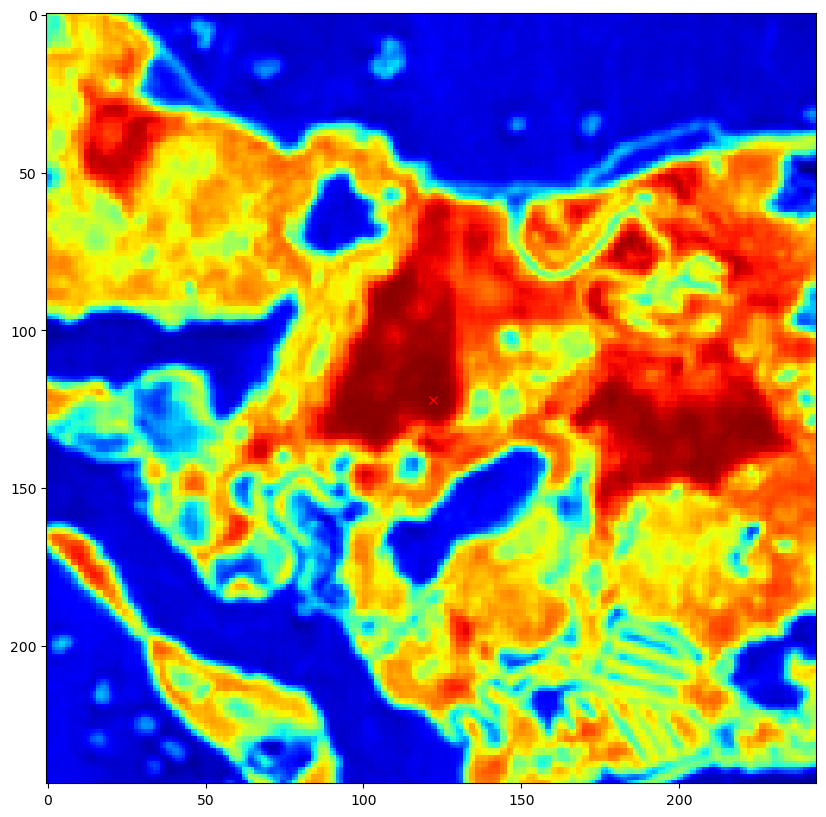

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(cs, cmap='jet')
plt.plot(x0, y0, 'xr')